In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_raw = pd.read_csv('dutch-message-testing.csv')
statements = [c for c in df_raw.columns[10:19]]

df = pd.DataFrame(columns=['statement', 'rating', 'participant_id', 'liberalness'])

for row in df_raw.iterrows():
    liberalness = row[1]['politicalLiberalness']
    participant_id = row[1]['participant_id']
    for q in statements:
        df = pd.concat([df, pd.DataFrame.from_records([{ 'statement': q, 'rating': row[1][q], 'participant_id': participant_id, 'liberalness': liberalness }])])

statement_order = df.groupby('statement')['rating'].mean().sort_values(ascending=False).index
df['statement'] = pd.Categorical(df['statement'], categories=statement_order, ordered=True)


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


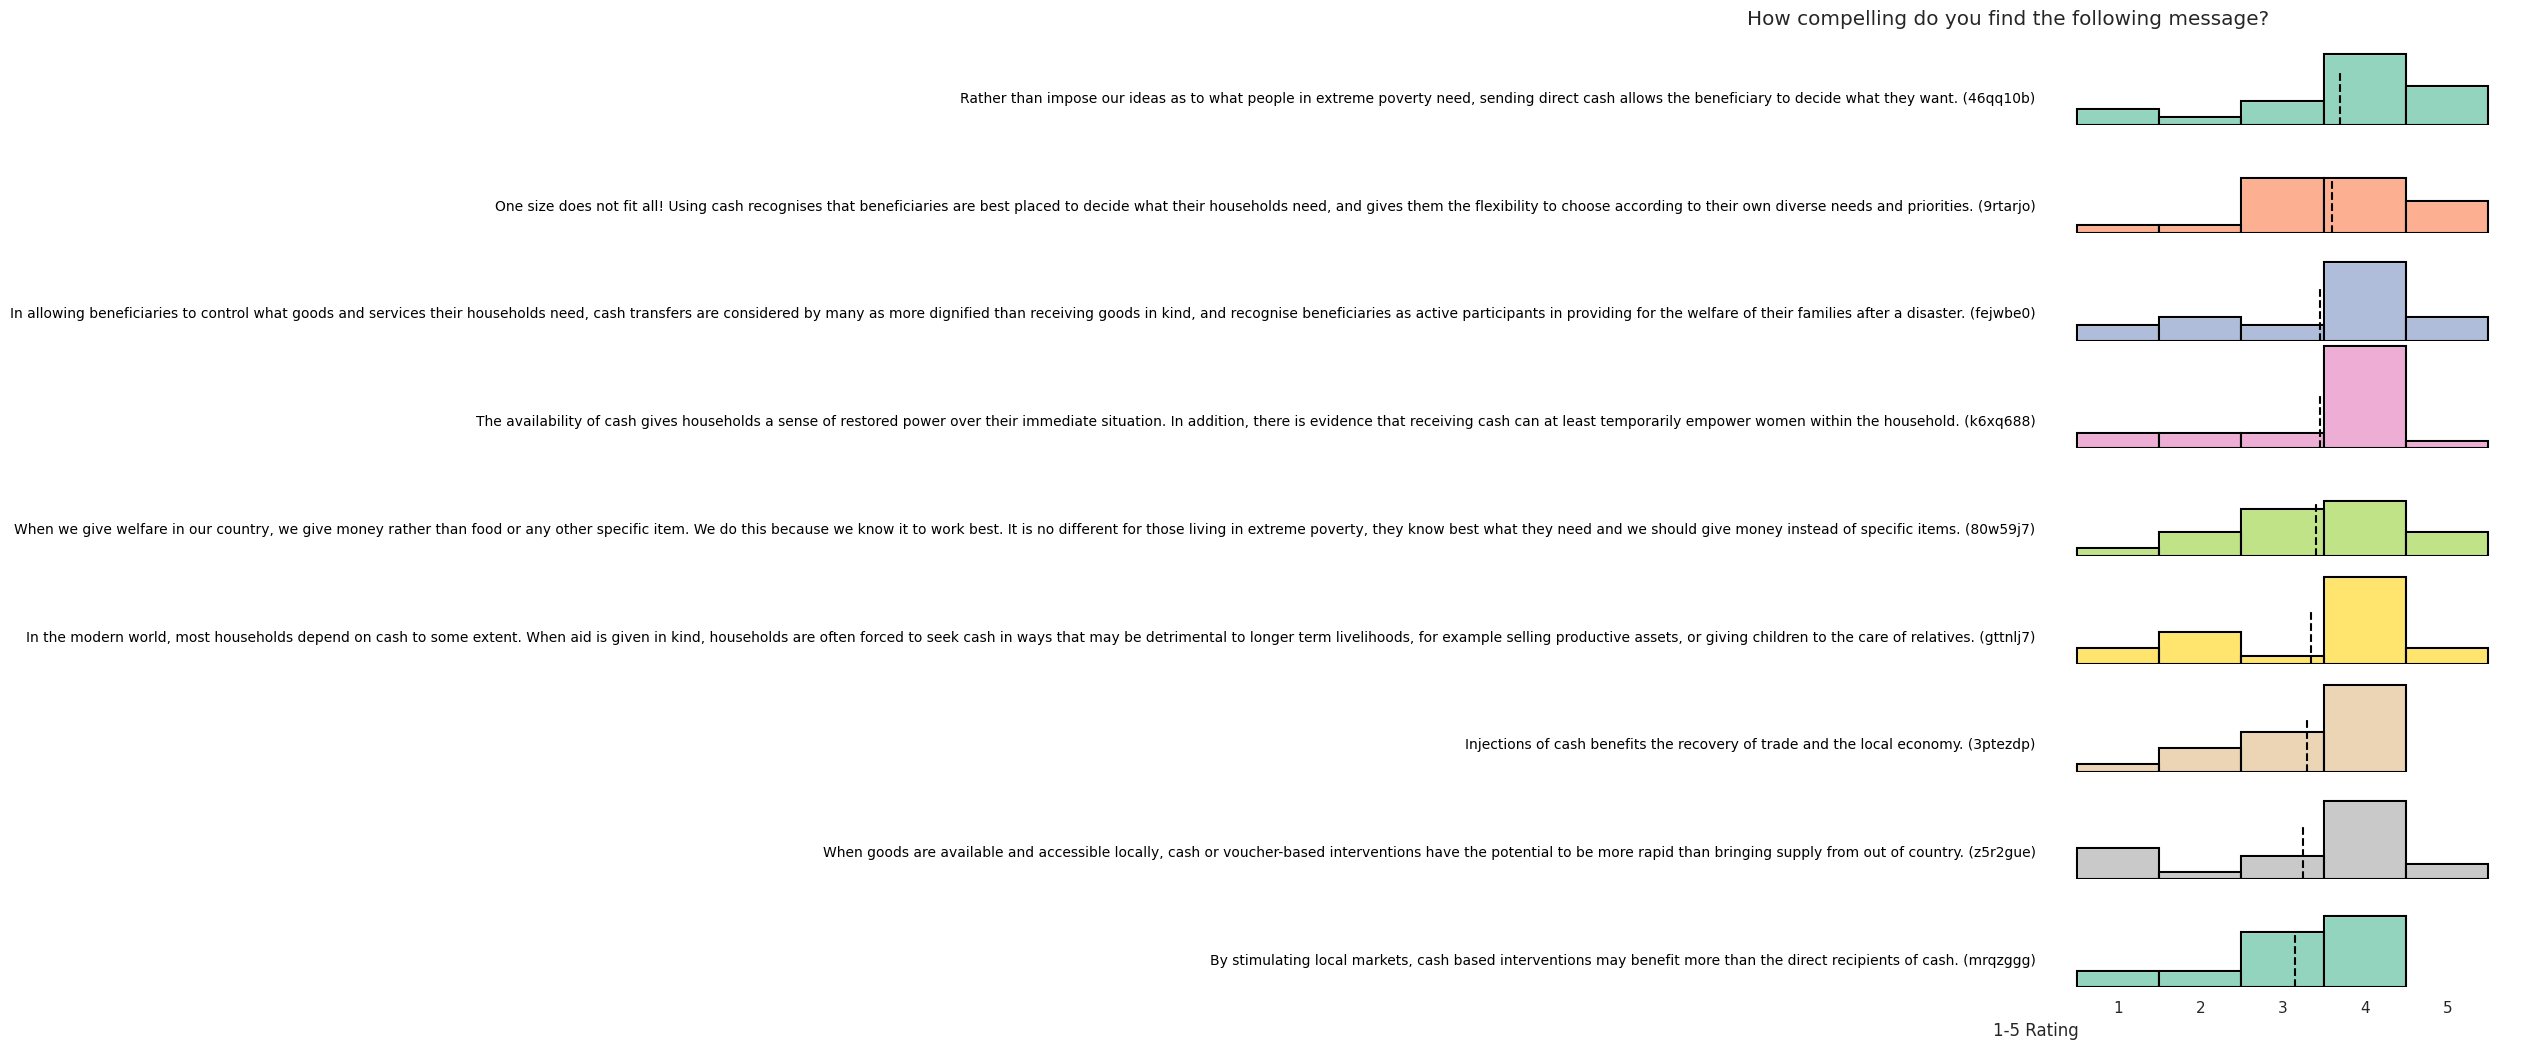

In [134]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2, 'figure.figsize':(11,8)})
palette = sns.color_palette("Set2", 12)

g = sns.FacetGrid(df, palette=palette, row="statement", hue="statement", aspect=9, height=1.2)

g.map_dataframe(sns.histplot, x="rating", fill=True, alpha=0.7, discrete=True)
g.map_dataframe(sns.histplot, x="rating", fill=False, color='black', discrete=True)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, 0.25, label, color='black', fontsize=10,
            ha="right", va="center", transform=ax.transAxes, wrap=True)
g.map(label, "statement")

def add_vline(data, variable, **kwargs):
    mean_value = data[variable].mean()
    plt.axvline(mean_value, color='black', linestyle='--', ymax = 0.5)

g.map_dataframe(add_vline, variable='rating')

g.fig.subplots_adjust(hspace=-.0)

g.set_titles("")
g.set(yticks=[], xlabel="1-5 Rating", ylabel="", xlim=(-6,6), xticks=[1,2,3,4,5])
g.despine(left=True, bottom=True)

plt.suptitle('How compelling do you find the following message?', y=0.97)

plt.savefig('ridgeplot.png')